In [226]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sklearn as sklearn
from sklearn import metrics, tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [227]:
# Excercise 2.7.1
births = pd.read_csv('births.csv')

# For each is in the apply, as it executes the python ternary for each row.
births['child_birth'] = births.apply(lambda row: 'at_home' if 'first line child birth, at home' in row['child_birth'] else 'not_at_home', axis=1)
births = births.rename(columns={'child_birth':'home'})
births

,provmin,urban,home,age_cat,age,etnicity,parity
0,68,strong,at_home,25-29 year,26,Dutch,2
1,12,moderate,not_at_home,25-29 year,29,Dutch,1
2,99,not,not_at_home,25-29 year,25,Mediterranean,2
3,68,moderate,not_at_home,30-34 year,30,Dutch,3
4,68,strong,not_at_home,30-34 year,33,Dutch,1
...,...,...,...,...,...,...,...
49698,69,very strong,not_at_home,< 25 year,23,Dutch,1
49699,42,moderate,not_at_home,30-34 year,32,Dutch,1
49700,69,moderate,at_home,25-29 year,25,Mediterranean,3
49701,69,very strong,at_home,25-29 year,25,Dutch,2


In [228]:
# Excercise 2.7.2
births['parity'] = births.apply(lambda row: 'primi' if row['parity'] == 1 else 'multi', axis=1)
births = births.rename(columns={'parity':'pari'})
births

,provmin,urban,home,age_cat,age,etnicity,pari
0,68,strong,at_home,25-29 year,26,Dutch,multi
1,12,moderate,not_at_home,25-29 year,29,Dutch,primi
2,99,not,not_at_home,25-29 year,25,Mediterranean,multi
3,68,moderate,not_at_home,30-34 year,30,Dutch,multi
4,68,strong,not_at_home,30-34 year,33,Dutch,primi
...,...,...,...,...,...,...,...
49698,69,very strong,not_at_home,< 25 year,23,Dutch,primi
49699,42,moderate,not_at_home,30-34 year,32,Dutch,primi
49700,69,moderate,at_home,25-29 year,25,Mediterranean,multi
49701,69,very strong,at_home,25-29 year,25,Dutch,multi


In [229]:
# Excercise 2.7.3
unique_etnicities = births['etnicity'].unique()
print(unique_etnicities)

births['etnicity'] = births.apply(lambda row: 'Dutch' if 'Dutch' == row['etnicity']  else 'Not Dutch', axis=1)
births = births.rename(columns={'etnicity':'etni'})
births

['Dutch' 'Mediterranean' 'Hindu' 'other European' 'Creole' 'Asian' 'other']


,provmin,urban,home,age_cat,age,etni,pari
0,68,strong,at_home,25-29 year,26,Dutch,multi
1,12,moderate,not_at_home,25-29 year,29,Dutch,primi
2,99,not,not_at_home,25-29 year,25,Not Dutch,multi
3,68,moderate,not_at_home,30-34 year,30,Dutch,multi
4,68,strong,not_at_home,30-34 year,33,Dutch,primi
...,...,...,...,...,...,...,...
49698,69,very strong,not_at_home,< 25 year,23,Dutch,primi
49699,42,moderate,not_at_home,30-34 year,32,Dutch,primi
49700,69,moderate,at_home,25-29 year,25,Not Dutch,multi
49701,69,very strong,at_home,25-29 year,25,Dutch,multi


In [230]:
# Excercise 2.7.4-6
X = births[['pari', 'age_cat', 'etni', 'urban']]
y = births['home'] 

In [231]:
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression Model
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
logistic_y_pred = logistic_model.predict(X_test)

# Decision Tree Model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)

# Evaluation
print("Simple train/test split")
print("Logistic Regression Model:")
print(classification_report(y_test, logistic_y_pred))
print('\n----------------------------------------------------------------------------\n\n')
print("Decision Tree Model:")
print(classification_report(y_test, tree_y_pred))

Simple train/test split
Logistic Regression Model:
              precision    recall  f1-score   support

     at_home       0.60      0.56      0.58      4133
 not_at_home       0.70      0.73      0.72      5808

    accuracy                           0.66      9941
   macro avg       0.65      0.65      0.65      9941
weighted avg       0.66      0.66      0.66      9941


----------------------------------------------------------------------------


Decision Tree Model:
              precision    recall  f1-score   support

     at_home       0.59      0.61      0.60      4133
 not_at_home       0.72      0.70      0.71      5808

    accuracy                           0.66      9941
   macro avg       0.65      0.65      0.65      9941
weighted avg       0.66      0.66      0.66      9941



In [232]:
# Logistic Regression Model
logistic_model = LogisticRegression()
predicted_logistic = cross_val_predict(logistic_model, X, y, cv=10)

# Decision Tree Model
tree_model = DecisionTreeClassifier(max_depth=5)
tree_predicted = cross_val_predict(tree_model, X, y, cv=10)


# Evaluation
print("Simple k=10 K fold CV")
print("Logistic Regression Model:")
print(metrics.classification_report(y, predicted_logistic))
print('\n----------------------------------------------------------------------------\n\n')
print("Decision Tree Model:")
print(metrics.classification_report(y, tree_predicted))

Simple k=10 K fold CV
Logistic Regression Model:
              precision    recall  f1-score   support

     at_home       0.59      0.55      0.57     20506
 not_at_home       0.70      0.73      0.71     29197

    accuracy                           0.66     49703
   macro avg       0.64      0.64      0.64     49703
weighted avg       0.65      0.66      0.65     49703


----------------------------------------------------------------------------


Decision Tree Model:
              precision    recall  f1-score   support

     at_home       0.58      0.58      0.58     20506
 not_at_home       0.71      0.71      0.71     29197

    accuracy                           0.66     49703
   macro avg       0.64      0.64      0.64     49703
weighted avg       0.66      0.66      0.66     49703



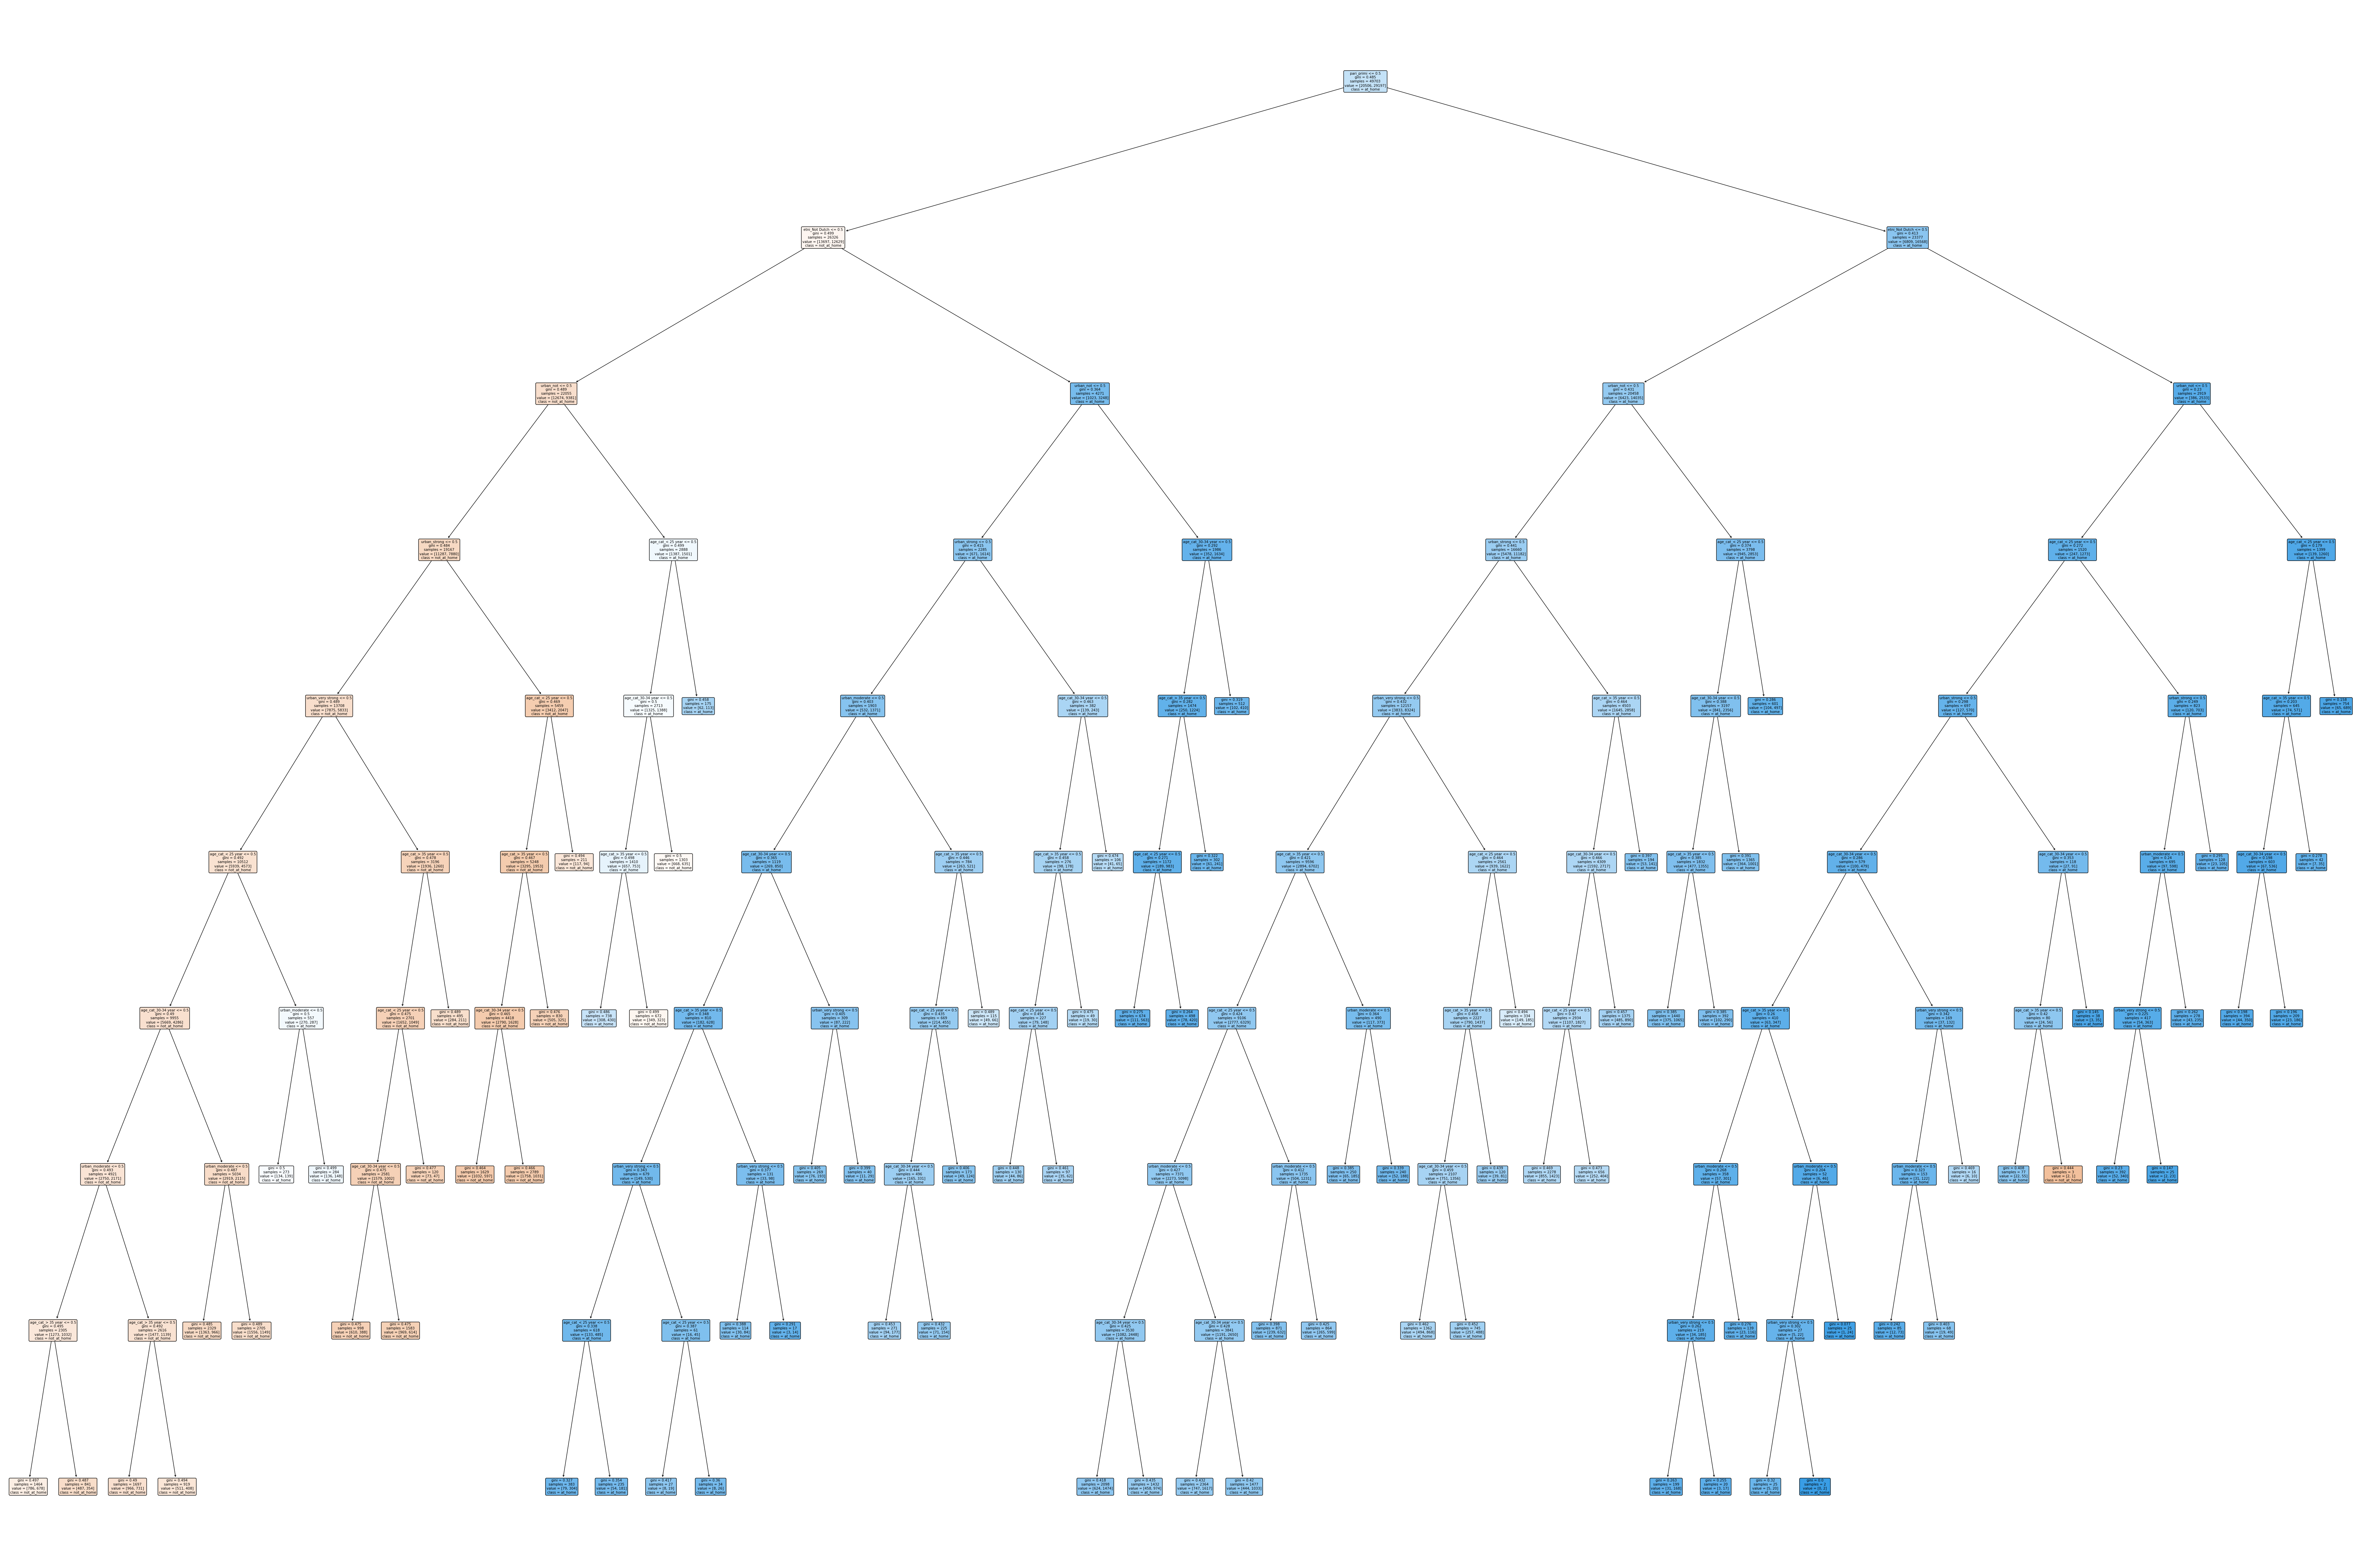

In [233]:
tree_model = DecisionTreeClassifier(max_depth=5)
tree_model.fit(X, y)

plt.figure(figsize=(90, 60))
plot_tree(tree_model, feature_names=X.columns, class_names=['not_at_home', 'at_home'], filled=True, rounded=True)
plt.show()